# Recognition of handwritten digits (MNIST) with neural networks

## Setup

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as ts
import tensorflow.keras as keras
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers

In [12]:
#data = tfds.load('mnist', split='train', as_supervised=True, shuffle_files=True)
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

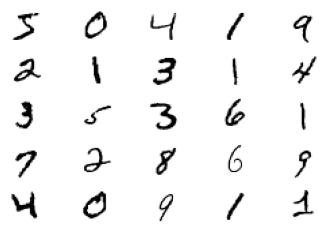

In [13]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [4]:
# shape of a single data point
xtrain[0].shape

(28, 28)

In [14]:
xtrain.shape

(60000, 28, 28)

In [15]:
xtest.shape

(10000, 28, 28)

In [16]:
model = models.Sequential()
model.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [18]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [19]:
xtrain = xtrain.reshape((60000, 28 * 28))
xtrain = xtrain.astype('float32') / 255

xtest = xtest.reshape((10000, 28 * 28))
xtest = xtest.astype('float32') / 255

In [20]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

Epoch 1/10
96/96 [==============================] - 2s 18ms/step - loss: 0.4861 - accuracy: 0.8684 - val_loss: 0.2615 - val_accuracy: 0.9262
Epoch 2/10
96/96 [==============================] - 2s 16ms/step - loss: 0.2261 - accuracy: 0.9356 - val_loss: 0.1923 - val_accuracy: 0.9440
Epoch 3/10
96/96 [==============================] - 2s 16ms/step - loss: 0.1630 - accuracy: 0.9535 - val_loss: 0.1526 - val_accuracy: 0.9566
Epoch 4/10
96/96 [==============================] - 2s 16ms/step - loss: 0.1255 - accuracy: 0.9650 - val_loss: 0.1267 - val_accuracy: 0.9628
Epoch 5/10
96/96 [==============================] - 1s 15ms/step - loss: 0.1002 - accuracy: 0.9719 - val_loss: 0.1062 - val_accuracy: 0.9693
Epoch 6/10
96/96 [==============================] - 2s 16ms/step - loss: 0.0823 - accuracy: 0.9765 - val_loss: 0.0985 - val_accuracy: 0.9712
Epoch 7/10
96/96 [==============================] - 1s 16ms/step - loss: 0.0687 - accuracy: 0.9810 - val_loss: 0.0956 - val_accuracy: 0.9700
Epoch 8/10
96

In [21]:
history = model.fit(xtrain, ytrain, epochs=10, batch_size=500, validation_split = 0.20)

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0578 - accuracy: 0.9821 - val_loss: 0.0974 - val_accuracy: 0.9728
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.1016 - val_accuracy: 0.9730
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.0998 - val_accuracy: 0.9758
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0310 - accuracy: 0.9909 - val_loss: 0.1087 - val_accuracy: 0.9740
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0267 - accuracy: 0.9924 - val_loss: 0.1185 - val_accuracy: 0.9755
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0210 - accuracy: 0.9937 - val_loss: 0.1109 - val_accuracy: 0.9778
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.1253 - val_accuracy:

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [25]:
train_loss, train_acc = model.evaluate(xrain, yrain)
test_loss, test_acc = model.evaluate(xtest, ytest)

print("Train accuracy:", round(train_acc, 3))
print("Train loss:", round(train_loss, 3))

print("Test accuracy:", round(test_acc, 3))
print("Test loss:", round(test_loss, 3))

313/313 [==============================] - 1s 2ms/step - loss: 0.1161 - accuracy: 0.9784
Test accuracy: 0.978
Test loss: 0.116


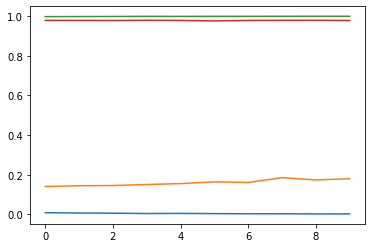

In [39]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

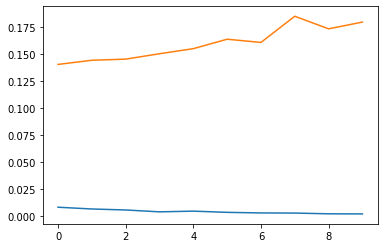

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])